# Student Performance Indicator

### Lifecycle of Machine Learning Project

- Understanding problem statement
- Data collection
- Data checks to perform
- Exploratory data analysis
- Data pre-processing
- Model Trainning
- Choose best model

### 1. Problem Statement:
This project understands how the students performance(test scores) is affected by other variables such as gender, ethnicity, parents level of education etc. 

In [2]:
# Install the required packages
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("dataset/studentPerformanceDataset.csv")

## Performing Basic Data Overview

In [4]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
data.shape

(1000, 8)

In [11]:
# Show the columns of the dataset
data.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [12]:
# Information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [13]:
# Finding null values in the dataset
data.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [17]:
# Check duplicates
data.duplicated().sum()

0

In [18]:
# Checking the number of unique values each column has

data.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

## Performing Exploratory Data Analysis

In [28]:
# finding the numerical and categorical variables
numerical_features = [feature for feature in data.columns if data[feature].dtype!='O']
categorical_features = [feature for feature in data.columns if data[feature].dtype=='O']

print(numerical_features)
print(categorical_features)


['math_score', 'reading_score', 'writing_score']
['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [25]:
# Getting unique categories of each of the categorical columns
print(f"Gender: {data.gender.unique()}")

print(f"Race: {data.race_ethnicity.unique()}")

print(f"Parent Education: {data.parental_level_of_education.unique()}")

print(f"Lunch Type: {data.lunch.unique()}")

print(f"Test Preparation Course: {data.test_preparation_course.unique()}")



Gender: ['female' 'male']
Race: ['group B' 'group C' 'group A' 'group D' 'group E']
Parent Education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Lunch Type: ['standard' 'free/reduced']
Test Preparation Course: ['none' 'completed']


#### Feature Engineering: Adding columns for total score and average score(since this is what we will be building our model for)

In [29]:
data['total_score'] = data.math_score + data.reading_score + data.writing_score
data['average_score'] = data.total_score / 3

In [30]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


## Visualizing our Data

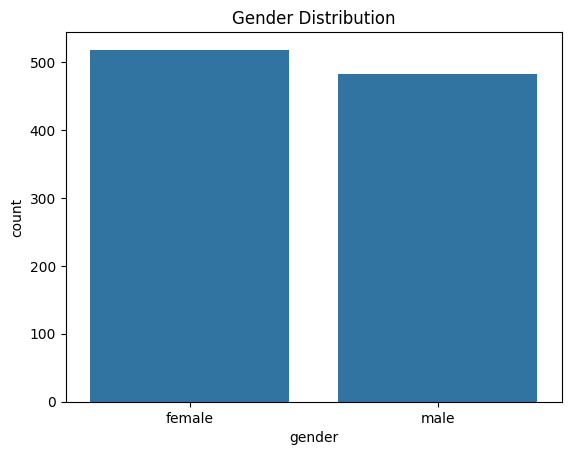

In [32]:
# finding distribution of gender
sns.countplot(data=data,x=data['gender'])
plt.title("Gender Distribution")
plt.show()

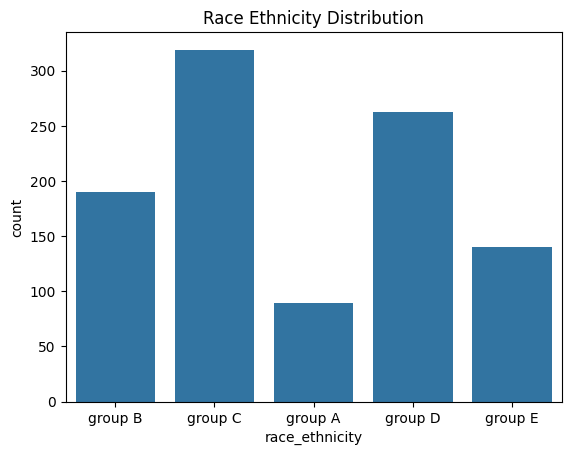

In [34]:
# Distribution of Race Ethnicity
sns.countplot(data=data,x=data.race_ethnicity)
plt.title("Race Ethnicity Distribution")
plt.show()

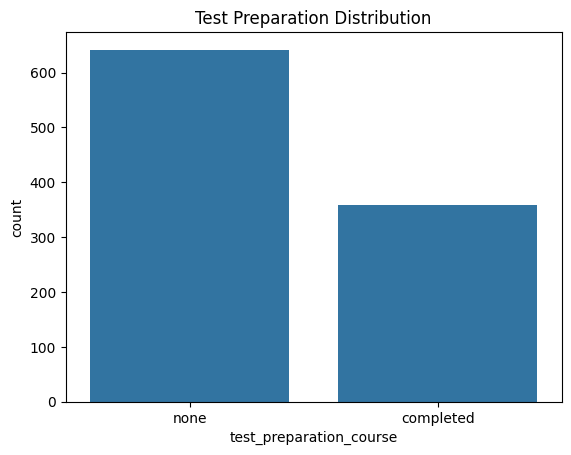

In [38]:
# test preparation
sns.countplot(data=data,x=data.test_preparation_course)
plt.title('Test Preparation Distribution')
plt.show()

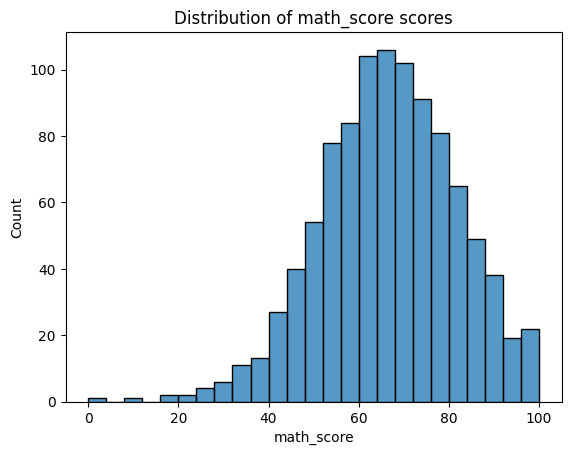

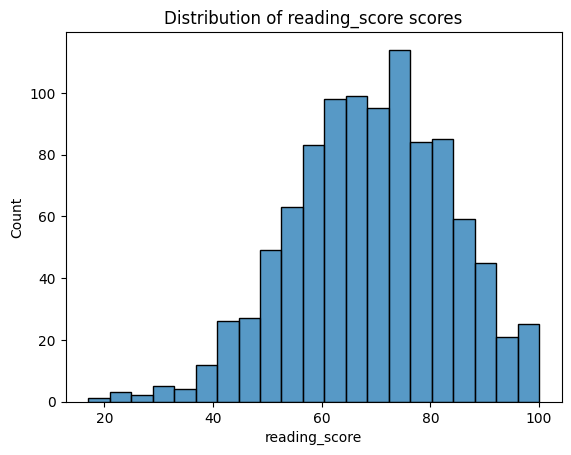

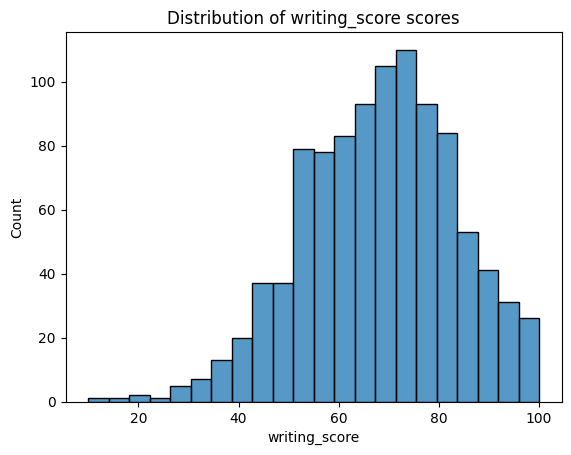

In [45]:
# Visualizing the test scores
test_scores = ['math_score','reading_score','writing_score']

for test in test_scores:
    sns.histplot(data=data,x=data[test])
    plt.title(f"Distribution of {test} scores")
    plt.show()

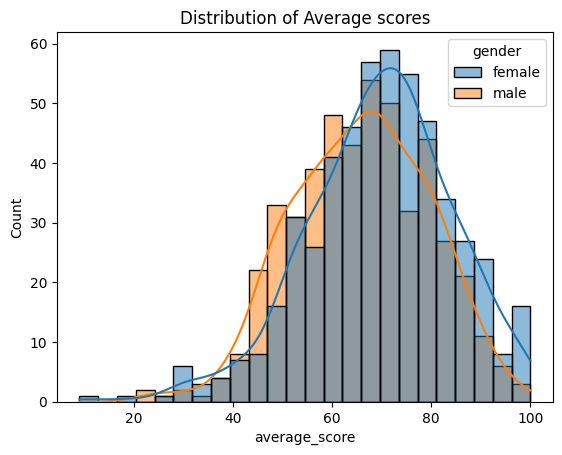

In [50]:
# visualizing average scores based on male female
sns.histplot(data=data,x=data.average_score,hue=data.gender,kde=True)
plt.title(f"Distribution of Average scores")
plt.show()